# Wasserhaushalt alpiner Einzugsgebiete

Wir wollen die klima- und landnutzungsbedingten Veränderungen auf den erweiterten Wasserhaushalt für das Einzugsgebiet der Brixentaler Ache untersuchen. Bevor wir die dazu nötigen Daten einlesen, müssen wir die library(lubridate) laden...

In [1]:
library(lubridate)


Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date



Und einen neuen Pfad für das Arbeitsverzeichnis setzen, da sich die Daten in einem Unterordner ('/home/jovyan/Wasserhaushalt_Brixental') befinden.

In [2]:
setwd('/home/jovyan/Wasserhaushalt_Brixental') 

Als nächstes Überprüfen wir, ob das Verzeichnis neu gesetzt wurde getwd() und können uns mit list.files() den Inhalt des Ordners anzeigen lassen.

In [3]:
getwd()

[1] "/home/jovyan/Wasserhaushalt_Brixental"

In [4]:
list.files()

[1] "cansubl_total.csv"           "etr_total.csv"              
[3] "interception_evar_total.csv" "precip_total.csv"           
[5] "runoff_total.csv"            "temp_total.csv"             
[7] "transpiration_total.csv"

Nun kann das eigentliche Einlesen der Daten mit dem Befehl read.table() erfolgen. Die Daten liegen im csv Format vor und sind durch Tabs getrennt, deswegen benötigen wir die Bezeichnung "\t". Zudem sagen wir R, dass die Spaltenbeschriftung übernommen header = TRUE wird und das Dezimaltrennzeichen ein Punkt ist. Wir lesen zunächst erst einmal den Niederschlag (precip) ein und lassen uns die summary ausgeben. In der Zusammenfassung erkennt man, dass sich nur die Klimaszenarien (A1B und RCP8.5) unterscheiden. Die erste Spalte des data frames ist die Datumsspalte mit monatlichen Werten.

In [5]:
precip_total=read.table("precip_total.csv", header=T, dec=".",sep="\t")
summary(precip_total)

       datetime        A1B.A           A1B.B           A1B.C      
 1981-10-31:   1   Min.   :  0.0   Min.   :  0.0   Min.   :  0.0  
 1981-11-30:   1   1st Qu.: 75.3   1st Qu.: 75.3   1st Qu.: 75.3  
 1981-12-31:   1   Median :117.2   Median :117.2   Median :117.2  
 1982-01-31:   1   Mean   :129.9   Mean   :129.9   Mean   :129.9  
 1982-02-28:   1   3rd Qu.:173.6   3rd Qu.:173.6   3rd Qu.:173.6  
 1982-03-31:   1   Max.   :426.4   Max.   :426.4   Max.   :426.4  
 (Other)   :1422                                                  
  A1B.BASELINE      RCP85.A          RCP85.B          RCP85.C      
 Min.   :  0.0   Min.   :  0.00   Min.   :  0.00   Min.   :  0.00  
 1st Qu.: 75.3   1st Qu.: 58.76   1st Qu.: 58.76   1st Qu.: 58.76  
 Median :117.2   Median :109.14   Median :109.14   Median :109.14  
 Mean   :129.9   Mean   :118.97   Mean   :118.97   Mean   :118.97  
 3rd Qu.:173.6   3rd Qu.:170.00   3rd Qu.:170.00   3rd Qu.:170.00  
 Max.   :426.4   Max.   :463.57   Max.   :463.57   Max. 

Wir transformieren mit as.Date() den Text aus der Spalte datetime in ein Datumformat.

In [6]:
precip_total$datetime = as.Date(precip_total$datetime)

Wir definieren die erste Zeitscheibe, die dem Referenzzeitraum (1981-2005) entspricht. Da wir uns hier am hydrologischen Jahr orientieren, beginnt diese am 1981-10-31 und endet am 2005-09-30. Zudem wollen wir alle Szenarien (Spalten) auswählen.

In [7]:
precip_1 = precip_total[precip_total$datetime>="1981-10-31" & precip_total$datetime<="2005-09-30",]

Jetzt können wir schon einen ersten line Plot machen, in dem wir für die erste Zeitscheibe den Niederschlag der beiden Klimaszenarien in zwei unterschiedlichen Farben darstellen. Damit die beiden Linien die gleiche plot range haben, setzten wir das ylim auf die range des RCP8.5 Niederschlags. Anschließend beschriften wir die Achsen und fügen einen aussagekräftigen Titel hinzu. Zusätzlich legen wir noch eine Legende an.

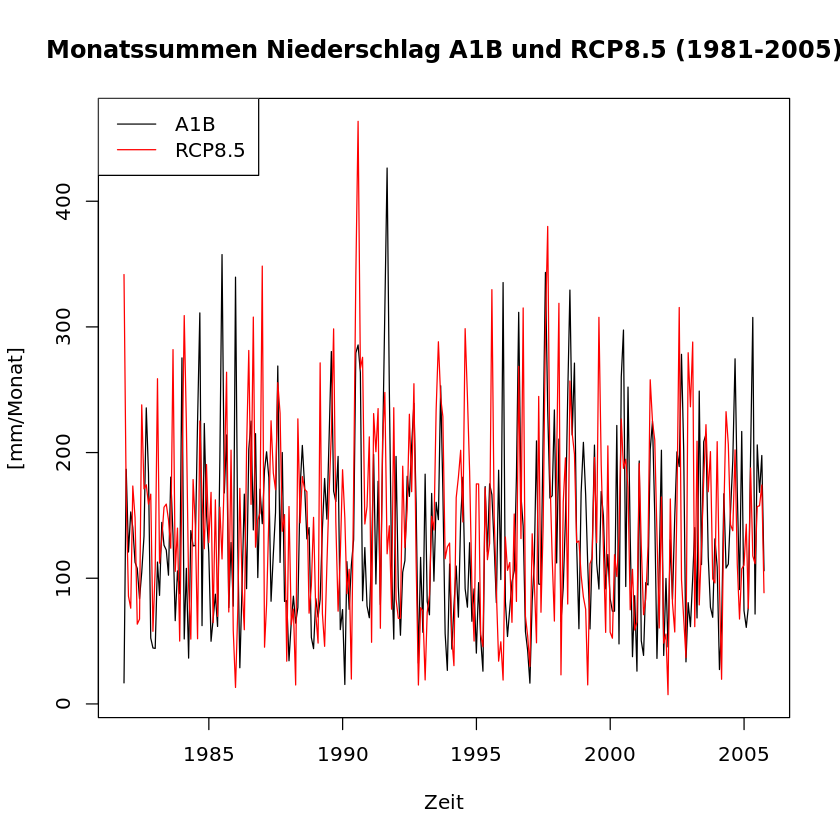

In [8]:
plot(precip_1$datetime,precip_1$A1B.BASELINE, type="l", ylim=range(precip_1$RCP85.BASELINE), ylab="[mm/Monat]", xlab="Zeit")
lines(precip_1$datetime, precip_1$RCP85.BASELINE, col="red")
title(main="Monatssummen Niederschlag A1B und RCP8.5 (1981-2005)")
legend("topleft",legend=c("A1B","RCP8.5"), col=c("black","red"), lty=1)

Als nächstes aggregieren wir die Monatsniederschlagswerte zu Mittelwerten für den Zeitraum 1981-2005 mit der Funktion aggregate(). Bevor wir mit dem Aggregieren loslegen können, müssen wir unserem data frame eine Spalte mit den Monatswerten aus der Spalte datetime hinzufügen. Danach können wir die Werte des A1B.A Szenarios anhand der Monate als Mittelwerte FUN=mean zusammenfassen.  

In [9]:
precip_1$month = format(precip_1$datetime, "%m")
precip_1_agg_A1B= aggregate(precip_1$A1B.BASELINE ~ month, data=precip_1, FUN=mean)
precip_1_agg_A1B

month,precip_1$A1B.BASELINE
01,102.55858
02,90.33404
03,108.56462
04,129.25596
05,135.93267
06,197.04825
07,204.49654
08,205.87704
09,136.76788
10,93.76092


dim() zeigt die Dimensionen (rows and columns) des data frames an.

In [10]:
dim(precip_1_agg_A1B)

[1] 12  2

ncol() zeigt die Anzahl an Spalten und nrow() die der Zeilen.

In [11]:
ncol(precip_1_agg_A1B)

[1] 2

Wir können den Spalten des data frames noch aussagekräftige Namen mit dem Befehl colnames() geben. 

In [12]:
colnames(precip_1_agg_A1B)=c("Monat","Niederschlag.A1B")
precip_1_agg_A1B

Monat,Niederschlag.A1B
01,102.55858
02,90.33404
03,108.56462
04,129.25596
05,135.93267
06,197.04825
07,204.49654
08,205.87704
09,136.76788
10,93.76092


Bevor es zum erneuten Plotten geht, aggregieren wir ebenfalls den Niederschlag des RCP8.5 Szenarios und weisen den Spalten die gleichen Beschriftungen zu. 

In [13]:
precip_1_agg_RCP85 = aggregate(precip_1$RCP85.BASELINE ~ month, data=precip_1, FUN=mean)
colnames(precip_1_agg_RCP85) = c("Monat", "Niederschlag.RCP8.5")
precip_1_agg_RCP85

Monat,Niederschlag.RCP8.5
01,126.73296
02,98.69688
03,124.01000
04,130.34417
05,141.60842
06,184.10788
07,227.93708
08,214.95083
09,143.47338
10,110.84137


Wir Plotten nun die Niederschlagsregime der beiden Klimaszenarien für die erste Zeitscheibe. Zum besseren Ablesen der Werte können wir mit dem Befehl grid(NULL, NULL, lwd =1) ein Raster über den Plot legen. Möchte man die Schriftgröße des Titels anpassen, so kann man das über den Befehl cex.main machen. Der Wertebereich ist hier von 0.1 bis 1.

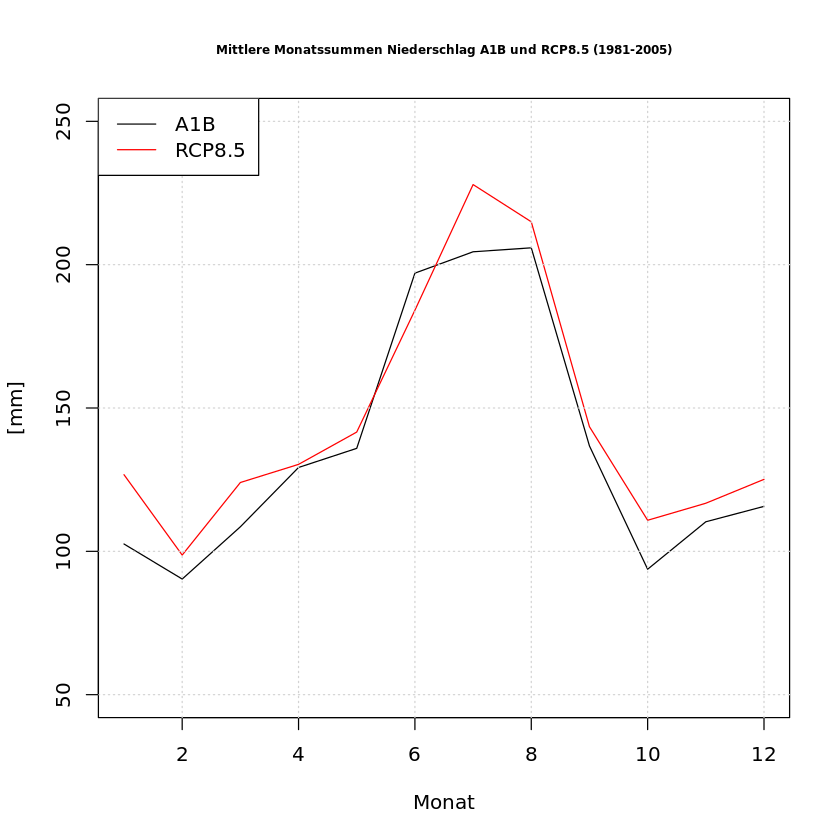

In [14]:
plot(precip_1_agg_A1B$Monat, precip_1_agg_A1B$Niederschlag.A1B, type ="l", ylim=c(50,250),ylab="[mm]", xlab="Monat")
lines(precip_1_agg_RCP85$Monat, precip_1_agg_RCP85$Niederschlag.RCP8.5, col="red")
title(main="Mittlere Monatssummen Niederschlag A1B und RCP8.5 (1981-2005)",cex.main=0.6)
grid(NULL,NULL, lwd = 1)
legend("topleft", legend = c("A1B","RCP8.5"),col = c("black","red"), lty=1)

Wie kann das Aggregieren für mehrere Szenarien verkürzt werden? Hierzu lesen wir die Evapotranspiration (etr) ein und transformieren die Datumsspalte erneut. Zudem fügen wir wieder eine Spalte mit den Monaten hinzu und lassen uns die ersten zehn Reihen des data frames anzeigen.

In [15]:
etr_total = read.table("etr_total.csv", header=T, dec=".", sep="\t")
etr_total$datetime = as.Date(etr_total$datetime)
etr_total$month = format(etr_total$datetime, "%m")
head(etr_total, n=10)

datetime,A1B.A,A1B.B,A1B.C,A1B.BASELINE,RCP85.A,RCP85.B,RCP85.C,RCP85.BASELINE,month
1981-10-31,28.26954,28.26953,28.26953,28.26952,30.21930,30.21931,30.21931,30.21928,10
1981-11-30,20.21451,20.21451,20.21452,20.21453,30.07118,30.07119,30.07119,30.07119,11
1981-12-31,20.43260,20.43260,20.43260,20.43260,25.83942,25.83942,25.83942,25.83942,12
1982-01-31,21.82174,21.82174,21.82174,21.82174,19.35030,19.35030,19.35030,19.35030,01
1982-02-28,18.50415,18.50414,18.50415,18.50415,16.92410,16.92410,16.92410,16.92410,02
1982-03-31,23.68474,23.68475,23.68475,23.68475,59.31021,59.31020,59.31019,59.31019,03
1982-04-30,35.16696,35.16696,35.16696,35.16696,51.35741,51.35741,51.35741,51.35739,04
1982-05-31,66.98856,66.98858,66.98854,66.98855,75.86686,75.86689,75.86682,75.86686,05
1982-06-30,96.37681,96.37679,96.37679,96.37677,103.27963,103.27962,103.27960,103.27960,06
1982-07-31,114.43524,114.43531,114.43533,114.43527,124.47223,124.47217,124.47218,124.47220,07


Nun machen wir uns mit Listen in R vertraut. Listen können Elemente verschiedenen Typs beinhalten, wie zum Beispiel numbers, strings und vectors. Wir erstellen uns jetzt eine Testliste indem wir Szenarien und Monate zunächst als Vektoren definieren.

scenario=c('A1B.A', 'A1B.B', 'A1B.C', 'A1B.BASELINE', 'RCP85.A', 'RCP85.B', 'RCP85.C', 'RCP85.BASELINE')
month=c(seq(1,12,1))
test_list=list(month,scenario) # Liste ist ein Vektor, der Objekte enthält

Wie sieht diese Liste nun aus?

In [16]:
scenario = colnames(etr_total[2:9])
monate = c(seq(1,12,1))
test_list = list(monate,scenario)
test_list

[[1]]
 [1]  1  2  3  4  5  6  7  8  9 10 11 12

[[2]]
[1] "A1B.A"          "A1B.B"          "A1B.C"          "A1B.BASELINE"  
[5] "RCP85.A"        "RCP85.B"        "RCP85.C"        "RCP85.BASELINE"

Wie lang ist diese Liste? length() gibt die Länge aus.

In [17]:
length(test_list)

[1] 2

Wir wählen eine Objektreihe aus der Liste mit doppelten [[]] aus.

In [18]:
test_list[[2]]

[1] "A1B.A"          "A1B.B"          "A1B.C"          "A1B.BASELINE"  
[5] "RCP85.A"        "RCP85.B"        "RCP85.C"        "RCP85.BASELINE"

Wollen wir mehrere Objektreihen aus der Liste auswählen, so können wir einen Bereich in den [] definieren.

In [19]:
test_list[1:2]

[[1]]
 [1]  1  2  3  4  5  6  7  8  9 10 11 12

[[2]]
[1] "A1B.A"          "A1B.B"          "A1B.C"          "A1B.BASELINE"  
[5] "RCP85.A"        "RCP85.B"        "RCP85.C"        "RCP85.BASELINE"

Wollen wir aber nur einen Member aus einer Objektreihe auswählen, verwenden wir doppelte [[]] für die Obejktreihe und einfache [] für die Position des Objekts aus der Reihe. In den einfachen [] kann man auch einen Auswahlbereich definieren, beispielsweise mit [1:5].

In [20]:
test_list[[2]][1]
test_list[[1]][1:8]

[1] "A1B.A"

[1] 1 2 3 4 5 6 7 8

Soweit das mit der Navigation in Listen klappt, können wir uns mit den for() loops (Schleifen) in R auseinandersetzten. Mit dem loop können wir uns über eine Zählervariable durch Listen bewegen. Für den Anfang schreiben wir eine einfache Schleife: 

for(i in c(1:12)){ 
    print(i)
    }
    
Wir sehen, i ist die Variable, die so lange ausgegeben wird bis der Anweisungsvektor erfüllt ist. In unserem Fall ist die Abbruchbedingung die Zahl 12.

In [21]:
for(i in c(1:12)){
    print(i)
}

[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12


Bevor wir die Schleife für das Aggregieren anwenden können, definieren wir wieder die erste Zeitscheibe für etr und legen eine leere Liste an, in die die aggregierten Werte geschrieben werden: 

etr_1_list = list()

Wie lange muss unser Anweisungsvektor sein?

Wir wollen alle aggregierten Monatswerte eines Szenarios als eine eigene Vektorreihe in die Liste schreiben und verwenden deswegen etr_1_list[[i]]=aggregate(). Die aggregate Funktion ist bis auf eine kleine Ausnahme identisch mit der bereits bekannten Funktion. Wir müssen nur definieren für welchen Wertebereich die Zusammenfassung erfolgen soll. Dazu schreiben wir aggregate(etr_[[1+i]] ~ .... mit dem 1+i gehen wir sicher, dass die Zusammenfassung nicht für die Datumsspalte durchgeführt wird. War das Aggregieren erfolgreich, können wir uns die erstellte Liste und den Aufbau mal genauer anschauen.

In [22]:
etr_1 = etr_total[etr_total$datetime>="1981-10-31" & etr_total$datetime<="2005-09-30",]
etr_1_list=list()
for(i in c(1:8)){
    etr_1_list[[i]]=aggregate(etr_1[[i+1]] ~ month, data=etr_1, FUN= mean)
}
etr_1_list

month,etr_1[[i + 1]]
01,18.37867
02,18.57516
03,26.97324
04,40.23301
05,65.83493
06,90.50327
07,105.43671
08,95.30938
09,60.10189
10,36.38577


Wie lang ist unsere Liste?

In [23]:
length(etr_1_list)

[1] 8

Jetzt können wir diese Liste plotten indem wir wieder für jede Linie in unserem Plot eine Vektorreihe auswählen mit [[]]. Für die Plots muss keine Datumsspalte ausgewählt werden, da wir ja nur 12 Objekte in der Vektorreihe haben. Nun könnt ihr einfach alle weiteren Szenarien mit lines() hinzufügen und einer bestimmten Farbe oder einer anderen Liniensignatur lty= zuweisen. In der Legende kann man über c() für jede Linie einen Namen, die jeweilige Farbe und/oder Liniensignatur hinzufügen.

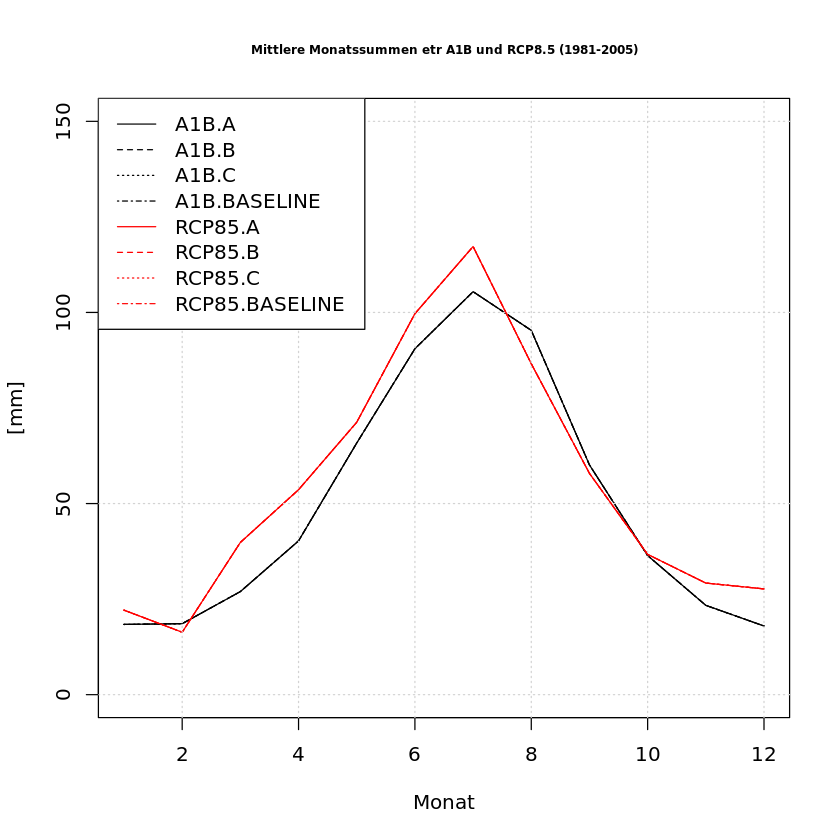

In [24]:
plot(etr_1_list[[4]], type="l",ylim=c(0,150),ylab="[mm]",xlab="Monat")
lines(etr_1_list[[1]], col="black", lty=2)
lines(etr_1_list[[2]], col= "black", lty =3)
lines(etr_1_list[[3]], col ="black", lty =4)
lines(etr_1_list[[8]], col="red")
lines(etr_1_list[[5]],col="red", lty=2)
lines(etr_1_list[[6]],col="red",lty=3)
lines(etr_1_list[[7]],col="red",lty=4)
grid(NULL,NULL, lwd =1)
title(main="Mittlere Monatssummen etr A1B und RCP8.5 (1981-2005)", cex.main=0.6)
legend("topleft", legend=scenario, col=c("black","black","black","black","red","red","red","red"), lty=c(1,2,3,4,1,2,3,4))

Für unseren nächsten Plot erstellen wir die restlichen drei Zeitscheiben von etr und aggregieren über die selbe Methodik die Monatswerte. Es wäre sinnvoll die Listen einfach durch zu nummerieren (etr_1_list, etr_2_list,...), um am Schluss den Überblick zu behalten.  

In [25]:
# Zweite Zeitscheibe etr
etr_2 = etr_total[etr_total$datetime>="2005-10-31" & etr_total$datetime<="2035-09-30",]
etr_2_list=list()
for(i in c(1:8)){
    etr_2_list[[i]]=aggregate(etr_2[[i+1]] ~ month, data=etr_2, FUN= mean)
}

# Dritte Zeitscheibe etr
etr_3 = etr_total[etr_total$datetime>="2035-10-31" & etr_total$datetime<="2065-09-30",]
etr_3_list=list()
for(i in c(1:8)){
    etr_3_list[[i]]=aggregate(etr_3[[i+1]] ~ month, data=etr_3, FUN= mean)
}

# Vierte Zeitscheibe etr
etr_4 = etr_total[etr_total$datetime>="2070-10-31" & etr_total$datetime<="2100-09-30",]
etr_4_list=list()
for(i in c(1:8)){
    etr_4_list[[i]]=aggregate(etr_4[[i+1]] ~ month, data=etr_4, FUN= mean)
}


Haben wir nun zu jeder Zeitscheibe die jeweilige Liste, können wir mit dem Befehl par(mfrow=c(2,2)) ein neues Plotfenster mit vier gleich großen Plots definieren. Dadurch bekommen wir ein Plotfenster mit nrows=2 und ncols=2. Zu beachten ist, dass mit jedem neuen Befehl plot() ein neues Fenster "gefüllt" wird. Ansonsten können wir, wie schon von oben bekannt, die Plotcodes übernehmen und untereinanderschreiben. Es sollte darauf geachtet werden, dass die Reihenfolge der Zeitscheiben stimmt. Damit wir wissen welche Zeitscheibe wo im Plot zu sehen ist, sollte dies aus der Überschrift hervorgehen. Zudem ist es sinnvoll die Achsen cex.axis= und Beschriftungen cex.lab= und die Legende cex= in ihrer Größe anzupassen. Die Umrandung der Legende kann durch bty="n" entfernt werden. Elemente, die sich stetig wiederholen, können wir auch einmal fix definieren werden, wie zum Beispiel die Linientypen in der Legende. Eventuell lässt sich das Plotten auch über eine Schleife automatisieren? Jetzt haben wir eine vollständige Zeitreihe, die wir analysieren können.

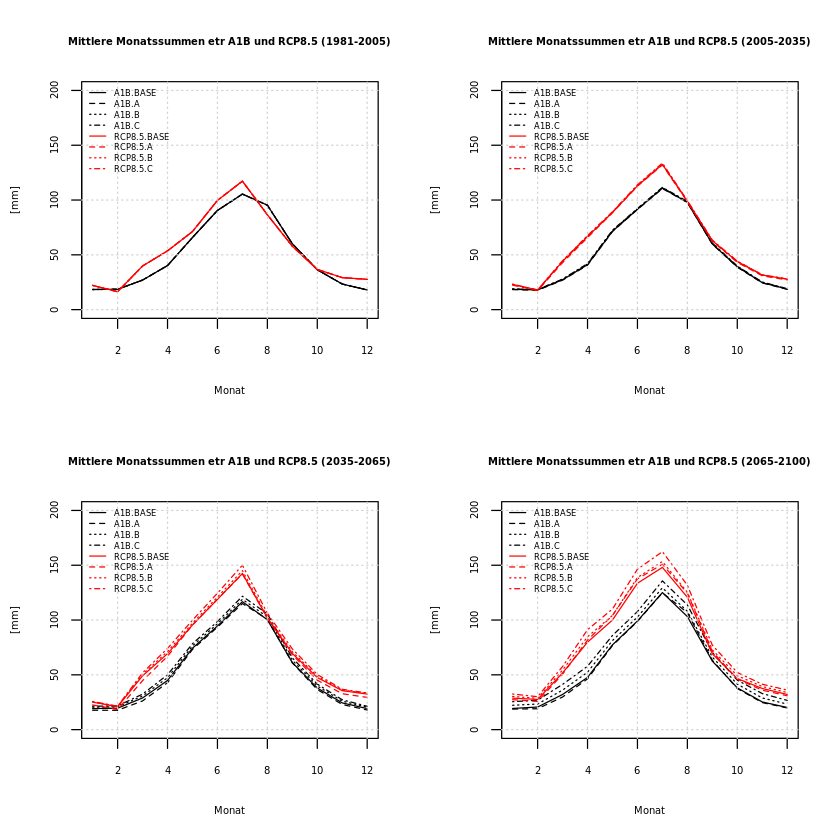

In [26]:
linetype=c(1,2,3,4,1,2,3,4) # Vektor, der die Linientypen in der Legende definiert

par(mfrow=c(2,2))
plot(etr_1_list[[4]],type="l",ylim=c(0,200),ylab="[mm]",xlab="Monat",cex.lab=0.6,cex.axis=0.6)
lines(etr_1_list[[1]],col="black",lty=2)
lines(etr_1_list[[2]],col="black",lty=3)
lines(etr_1_list[[3]],col="black",lty=4)
lines(etr_1_list[[8]],col="red")
lines(etr_1_list[[5]],col="red",lty=2)
lines(etr_1_list[[6]],col="red",lty=3)
lines(etr_1_list[[7]],col="red",lty=4)
grid(NULL, NULL, lwd = 1)
title(main="Mittlere Monatssummen etr A1B und RCP8.5 (1981-2005)",cex.main=0.6)
legend("topleft",legend=c("A1B.BASE","A1B.A","A1B.B","A1B.C","RCP8.5.BASE","RCP8.5.A","RCP8.5.B","RCP8.5.C"),
       col = c("black","black","black","black","red","red","red","red"),lty=linetype,bty="n",cex=0.5)

plot(etr_2_list[[4]],type="l",ylim=c(0,200),ylab="[mm]",xlab="Monat",cex.lab=0.6,cex.axis=0.6)
lines(etr_2_list[[1]],col="black",lty=2)
lines(etr_2_list[[2]],col="black",lty=3)
lines(etr_2_list[[3]],col="black",lty=4)
lines(etr_2_list[[8]],col="red")
lines(etr_2_list[[5]],col="red",lty=2)
lines(etr_2_list[[6]],col="red",lty=3)
lines(etr_2_list[[7]],col="red",lty=4)
grid(NULL, NULL, lwd = 1)
title(main="Mittlere Monatssummen etr A1B und RCP8.5 (2005-2035)",cex.main=0.6)
legend("topleft",legend=c("A1B.BASE","A1B.A","A1B.B","A1B.C","RCP8.5.BASE","RCP8.5.A","RCP8.5.B","RCP8.5.C"),
       col = c("black","black","black","black","red","red","red","red"),lty=linetype,bty="n",cex=0.5)

plot(etr_3_list[[4]],type="l",ylim=c(0,200),ylab="[mm]",xlab="Monat",cex.lab=0.6,cex.axis=0.6)
lines(etr_3_list[[1]],col="black",lty=2)
lines(etr_3_list[[2]],col="black",lty=3)
lines(etr_3_list[[3]],col="black",lty=4)
lines(etr_3_list[[8]],col="red")
lines(etr_3_list[[5]],col="red",lty=2)
lines(etr_3_list[[6]],col="red",lty=3)
lines(etr_3_list[[7]],col="red",lty=4)
grid(NULL, NULL, lwd = 1)
title(main="Mittlere Monatssummen etr A1B und RCP8.5 (2035-2065)",cex.main=0.6)
legend("topleft",legend=c("A1B.BASE","A1B.A","A1B.B","A1B.C","RCP8.5.BASE","RCP8.5.A","RCP8.5.B","RCP8.5.C"),
       col = c("black","black","black","black","red","red","red","red"),lty=linetype,bty="n",cex=0.5)

plot(etr_4_list[[4]],type="l",ylim=c(0,200),ylab="[mm]",xlab="Monat",cex.lab=0.6,cex.axis=0.6)
lines(etr_4_list[[1]],col="black",lty=2)
lines(etr_4_list[[2]],col="black",lty=3)
lines(etr_4_list[[3]],col="black",lty=4)
lines(etr_4_list[[8]],col="red")
lines(etr_4_list[[5]],col="red",lty=2)
lines(etr_4_list[[6]],col="red",lty=3)
lines(etr_4_list[[7]],col="red",lty=4)
grid(NULL, NULL, lwd = 1)
title(main="Mittlere Monatssummen etr A1B und RCP8.5 (2065-2100)",cex.main=0.6)
legend("topleft",legend=c("A1B.BASE","A1B.A","A1B.B","A1B.C","RCP8.5.BASE","RCP8.5.A","RCP8.5.B","RCP8.5.C"),
       col = c("black","black","black","black","red","red","red","red"),lty=linetype,bty="n",cex=0.5)

Falls wir die genauen Werte nicht aus den Liniendiagrammen ablesen können, kann man diese entweder in den jeweiligen Listen nachschauen oder man erstellt sich aus den einzelnen Listen einen jeweiligen data frame. Über den Befehl cbind.data.frame() werden die Vektorreihen aus der Liste spaltenweise, deswegen cbind für column bind, aneinander gefügt. Dazu wählen wir erstmal die erste Vektorreihe etr_4_list[[1]][1] aus, um mit einer Datumsspalte zu starten. Anschließend können weiteren Reihen (etr_4_list[[1]][1],etr_4_list[[1]][2],...) hinzugefügt werden durch eine einfach Auflistung. In dem data frame können wir nun die Werte der einzelnen Szenarien aus einer Zeitscheibe übersichtlich anschauen. Über colnames() können wir der Tabelle aussagekräftige Spaltenbeschriftungen geben. Mit dem selben Verfahren können wir die klima- und landnutzungsbedingten Veränderungen auf den Abfluss, die Evaporation aus dem flüssigen und festen Interzeptionsspeicher und die Transpiration untersuchen. Da es bei Temperatur und Niederschlag keine landnutzungsbedingte Veränderung gibt, reicht es in den Plots aus nur das Baseline Szenario darzustellen. Viel Erfolg bei der Interpretation der Ergebnisse!    

In [27]:
etr_4_table=cbind.data.frame(etr_4_list[[1]][1],etr_4_list[[1]][2],etr_4_list[[2]][2],etr_4_list[[3]][2],etr_4_list[[4]][2],
                      etr_4_list[[5]][2],etr_4_list[[6]][2],etr_4_list[[7]][2],etr_4_list[[8]][2])
colnames(etr_4_table)=c("month",scenario)
etr_4_table

month,A1B.A,A1B.B,A1B.C,A1B.BASELINE,RCP85.A,RCP85.B,RCP85.C,RCP85.BASELINE
01,18.73518,22.22669,25.51217,19.34001,27.34713,30.24063,32.49082,28.75703
02,19.08868,23.36015,26.87539,20.60940,25.74949,28.60455,30.05620,27.56818
03,29.76949,36.06939,41.28426,32.09749,50.59047,54.33579,57.57975,51.74827
04,46.35342,52.37825,57.83454,47.66917,81.73162,84.71653,91.17951,79.83899
05,76.76774,81.30218,85.94225,77.37016,104.21591,104.22462,110.07130,100.03403
06,98.68089,102.71654,107.72581,99.14225,137.54341,138.73061,146.39097,133.56263
07,124.86492,129.40186,135.72281,125.06856,150.85691,153.45743,162.38123,148.05121
08,106.74222,107.98884,113.78534,103.16305,124.50119,125.27063,131.76352,120.79655
09,63.32734,66.24782,70.52447,62.55147,71.26455,72.87037,77.10217,69.19152
10,37.56625,41.49643,45.19637,38.10471,46.12013,49.23684,52.17553,46.56801


In [28]:
#4. Hausaufgabe Julian Zwerenz 

#1. Einlesen aller Daten von cansubl und Datumseinstellung
#Einlesen von cansubl
cansubl_total=read.table("cansubl_total.csv", header=T, dec=".",sep="\t")
cansubl_total$datetime = as.Date(cansubl_total$datetime)
cansubl_total$month = format(cansubl_total$datetime, "%m")

#Transpiration
transpiration_total=read.table("transpiration_total.csv", header=T, dec=".",sep="\t")
transpiration_total$datetime = as.Date(transpiration_total$datetime)
transpiration_total$month = format(transpiration_total$datetime, "%m")

#Abfluss
runoff_total=read.table("runoff_total.csv", header=T, dec=".",sep="\t")
runoff_total$datetime = as.Date(runoff_total$datetime)
runoff_total$month = format(runoff_total$datetime, "%m")

#Interzeption
interception_evar_total=read.table("interception_evar_total.csv", header=T, dec=".",sep="\t")
interception_evar_total$datetime = as.Date(interception_evar_total$datetime)
interception_evar_total$month = format(interception_evar_total$datetime, "%m")


#Niederschlag
precip_total=read.table("precip_total.csv", header=T, dec=".",sep="\t")
precip_total$datetime = as.Date(precip_total$datetime)
precip_total$month = format(precip_total$datetime, "%m")

#Temperatur
temp_total=read.table("temp_total.csv", header=T, dec=".",sep="\t")
temp_total$datetime = as.Date(temp_total$datetime)
temp_total$month = format(temp_total$datetime, "%m")



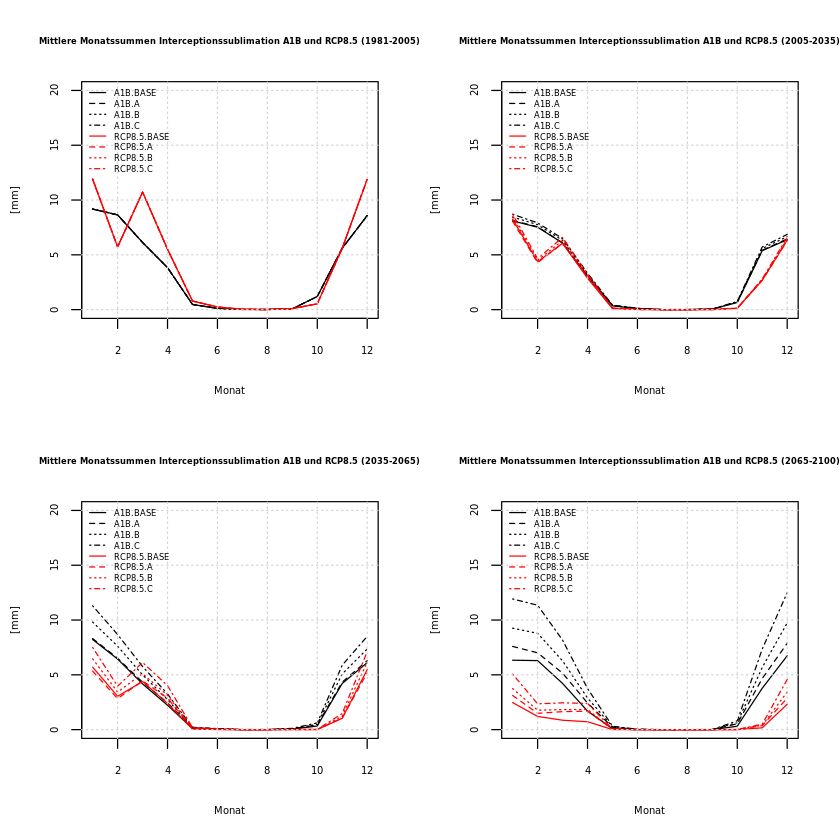

In [29]:
#2. Interceptionssublimation (cansubl)
#2.1 Berechnung der Daten
#Erste Zeit
cansubl_1 = cansubl_total[cansubl_total$datetime>="1981-10-31" & cansubl_total$datetime<="2005-09-30",]
cansubl_1_list=list()
for(i in c(1:8)){
    cansubl_1_list[[i]]=aggregate(cansubl_1[[i+1]] ~ month, data=etr_1, FUN= mean)
}

#Zweite Zeit
cansubl_2 = cansubl_total[cansubl_total$datetime>="2005-10-01" & cansubl_total$datetime<="2035-09-30",]
cansubl_2_list=list()
for(i in c(1:8)){
    cansubl_2_list[[i]]=aggregate(cansubl_2[[i+1]] ~ month, data=cansubl_2, FUN= mean)
}

#Dritte Zeit
cansubl_3 = cansubl_total[cansubl_total$datetime>="2035-10-01" & cansubl_total$datetime<="2065-09-30",]
cansubl_3_list=list()
for(i in c(1:8)){
    cansubl_3_list[[i]]=aggregate(cansubl_3[[i+1]] ~ month, data=cansubl_3, FUN= mean)
}

#Vierte Zeit
cansubl_4 = cansubl_total[cansubl_total$datetime>="2070-10-01" & cansubl_total$datetime<="2100-09-30",]
cansubl_4_list=list()
for(i in c(1:8)){
    cansubl_4_list[[i]]=aggregate(cansubl_4[[i+1]] ~ month, data=cansubl_4, FUN= mean)
}

#2.2 Plot Interceptionssublimation
par(mfrow=c(2,2))


plot(cansubl_1_list[[4]],type="l",ylim=c(0,20),ylab="[mm]",xlab="Monat",cex.lab=0.6,cex.axis=0.6)
lines(cansubl_1_list[[1]],col="black",lty=2)
lines(cansubl_1_list[[2]],col="black",lty=3)
lines(cansubl_1_list[[3]],col="black",lty=4)
lines(cansubl_1_list[[8]],col="red")
lines(cansubl_1_list[[5]],col="red",lty=2)
lines(cansubl_1_list[[6]],col="red",lty=3)
lines(cansubl_1_list[[7]],col="red",lty=4)
grid(NULL, NULL, lwd = 1)
title(main="Mittlere Monatssummen Interceptionssublimation A1B und RCP8.5 (1981-2005)",cex.main=0.5)
legend("topleft",legend=c("A1B.BASE","A1B.A","A1B.B","A1B.C","RCP8.5.BASE","RCP8.5.A","RCP8.5.B","RCP8.5.C"),
       col = c("black","black","black","black","red","red","red","red"),lty=linetype,bty="n",cex=0.5)

plot(cansubl_2_list[[4]],type="l",ylim=c(0,20),ylab="[mm]",xlab="Monat",cex.lab=0.6,cex.axis=0.6)
lines(cansubl_2_list[[1]],col="black",lty=2)
lines(cansubl_2_list[[2]],col="black",lty=3)
lines(cansubl_2_list[[3]],col="black",lty=4)
lines(cansubl_2_list[[8]],col="red")
lines(cansubl_2_list[[5]],col="red",lty=2)
lines(cansubl_2_list[[6]],col="red",lty=3)
lines(cansubl_2_list[[7]],col="red",lty=4)
grid(NULL, NULL, lwd = 1)
title(main="Mittlere Monatssummen Interceptionssublimation A1B und RCP8.5 (2005-2035)",cex.main=0.5)
legend("topleft",legend=c("A1B.BASE","A1B.A","A1B.B","A1B.C","RCP8.5.BASE","RCP8.5.A","RCP8.5.B","RCP8.5.C"),
       col = c("black","black","black","black","red","red","red","red"),lty=linetype,bty="n",cex=0.5)

plot(cansubl_3_list[[4]],type="l",ylim=c(0,20),ylab="[mm]",xlab="Monat",cex.lab=0.6,cex.axis=0.6)
lines(cansubl_3_list[[1]],col="black",lty=2)
lines(cansubl_3_list[[2]],col="black",lty=3)
lines(cansubl_3_list[[3]],col="black",lty=4)
lines(cansubl_3_list[[8]],col="red")
lines(cansubl_3_list[[5]],col="red",lty=2)
lines(cansubl_3_list[[6]],col="red",lty=3)
lines(cansubl_3_list[[7]],col="red",lty=4)
grid(NULL, NULL, lwd = 1)
title(main="Mittlere Monatssummen Interceptionssublimation A1B und RCP8.5 (2035-2065)",cex.main=0.5)
legend("topleft",legend=c("A1B.BASE","A1B.A","A1B.B","A1B.C","RCP8.5.BASE","RCP8.5.A","RCP8.5.B","RCP8.5.C"),
       col = c("black","black","black","black","red","red","red","red"),lty=linetype,bty="n",cex=0.5)

plot(cansubl_4_list[[4]],type="l",ylim=c(0,20),ylab="[mm]",xlab="Monat",cex.lab=0.6,cex.axis=0.6)
lines(cansubl_4_list[[1]],col="black",lty=2)
lines(cansubl_4_list[[2]],col="black",lty=3)
lines(cansubl_4_list[[3]],col="black",lty=4)
lines(cansubl_4_list[[8]],col="red")
lines(cansubl_4_list[[5]],col="red",lty=2)
lines(cansubl_4_list[[6]],col="red",lty=3)
lines(cansubl_4_list[[7]],col="red",lty=4)
grid(NULL, NULL, lwd = 1)
title(main="Mittlere Monatssummen Interceptionssublimation A1B und RCP8.5 (2065-2100)",cex.main=0.5)
legend("topleft",legend=c("A1B.BASE","A1B.A","A1B.B","A1B.C","RCP8.5.BASE","RCP8.5.A","RCP8.5.B","RCP8.5.C"),
       col = c("black","black","black","black","red","red","red","red"),lty=linetype,bty="n",cex=0.5)

#2.3 Interpretaion
# Im Sommer liegt kein Schnee, deshalb ist sie dort gegen 0. Je wärmer es wird, desto weniger Schnee fällt, und desto weniger kann Interzeptioniert werden.
#Bei bei einer nicht mehr vorhandenen Landnutzung durch den Menschen, findet mehr Interception statt, da mehr Bäume wachsen werden die die Interception befeuern.

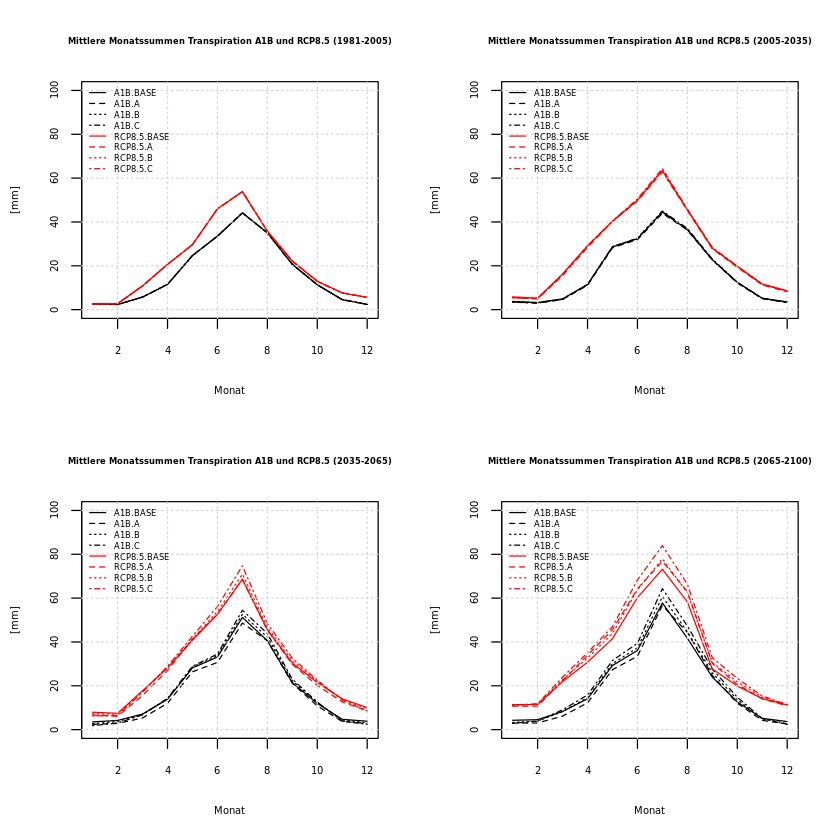

In [30]:
#3. Transpiration
#3.1 Berechnung der Daten
#Erste Zeit
transpiration_1 = transpiration_total[transpiration_total$datetime>="1981-10-31" & transpiration_total$datetime<="2005-09-30",]
transpiration_1_list=list()
for(i in c(1:8)){
    transpiration_1_list[[i]]=aggregate(transpiration_1[[i+1]] ~ month, data=etr_1, FUN= mean)
}

#Zweite Zeit
transpiration_2 = transpiration_total[transpiration_total$datetime>="2005-10-01" & transpiration_total$datetime<="2035-09-30",]
transpiration_2_list=list()
for(i in c(1:8)){
    transpiration_2_list[[i]]=aggregate(transpiration_2[[i+1]] ~ month, data=cansubl_2, FUN= mean)
}

#Dritte Zeit
transpiration_3 = transpiration_total[transpiration_total$datetime>="2035-10-01" & transpiration_total$datetime<="2065-09-30",]
transpiration_3_list=list()
for(i in c(1:8)){
    transpiration_3_list[[i]]=aggregate(transpiration_3[[i+1]] ~ month, data=cansubl_3, FUN= mean)
}

#Vierte Zeit
transpiration_4 = transpiration_total[transpiration_total$datetime>="2070-10-01" & transpiration_total$datetime<="2100-09-30",]
transpiration_4_list=list()
for(i in c(1:8)){
    transpiration_4_list[[i]]=aggregate(transpiration_4[[i+1]] ~ month, data=cansubl_4, FUN= mean)
}

#3.2 Plot Transpiration
par(mfrow=c(2,2))


plot(transpiration_1_list[[4]],type="l",ylim=c(0,100),ylab="[mm]",xlab="Monat",cex.lab=0.6,cex.axis=0.6)
lines(transpiration_1_list[[1]],col="black",lty=2)
lines(transpiration_1_list[[2]],col="black",lty=3)
lines(transpiration_1_list[[3]],col="black",lty=4)
lines(transpiration_1_list[[8]],col="red")
lines(transpiration_1_list[[5]],col="red",lty=2)
lines(transpiration_1_list[[6]],col="red",lty=3)
lines(transpiration_1_list[[7]],col="red",lty=4)
grid(NULL, NULL, lwd = 1)
title(main="Mittlere Monatssummen Transpiration A1B und RCP8.5 (1981-2005)",cex.main=0.5)
legend("topleft",legend=c("A1B.BASE","A1B.A","A1B.B","A1B.C","RCP8.5.BASE","RCP8.5.A","RCP8.5.B","RCP8.5.C"),
       col = c("black","black","black","black","red","red","red","red"),lty=linetype,bty="n",cex=0.5)

plot(transpiration_2_list[[4]],type="l",ylim=c(0,100),ylab="[mm]",xlab="Monat",cex.lab=0.6,cex.axis=0.6)
lines(transpiration_2_list[[1]],col="black",lty=2)
lines(transpiration_2_list[[2]],col="black",lty=3)
lines(transpiration_2_list[[3]],col="black",lty=4)
lines(transpiration_2_list[[8]],col="red")
lines(transpiration_2_list[[5]],col="red",lty=2)
lines(transpiration_2_list[[6]],col="red",lty=3)
lines(transpiration_2_list[[7]],col="red",lty=4)
grid(NULL, NULL, lwd = 1)
title(main="Mittlere Monatssummen Transpiration A1B und RCP8.5 (2005-2035)",cex.main=0.5)
legend("topleft",legend=c("A1B.BASE","A1B.A","A1B.B","A1B.C","RCP8.5.BASE","RCP8.5.A","RCP8.5.B","RCP8.5.C"),
       col = c("black","black","black","black","red","red","red","red"),lty=linetype,bty="n",cex=0.5)

plot(transpiration_3_list[[4]],type="l",ylim=c(0,100),ylab="[mm]",xlab="Monat",cex.lab=0.6,cex.axis=0.6)
lines(transpiration_3_list[[1]],col="black",lty=2)
lines(transpiration_3_list[[2]],col="black",lty=3)
lines(transpiration_3_list[[3]],col="black",lty=4)
lines(transpiration_3_list[[8]],col="red")
lines(transpiration_3_list[[5]],col="red",lty=2)
lines(transpiration_3_list[[6]],col="red",lty=3)
lines(transpiration_3_list[[7]],col="red",lty=4)
grid(NULL, NULL, lwd = 1)
title(main="Mittlere Monatssummen Transpiration A1B und RCP8.5 (2035-2065)",cex.main=0.5)
legend("topleft",legend=c("A1B.BASE","A1B.A","A1B.B","A1B.C","RCP8.5.BASE","RCP8.5.A","RCP8.5.B","RCP8.5.C"),
       col = c("black","black","black","black","red","red","red","red"),lty=linetype,bty="n",cex=0.5)

plot(transpiration_4_list[[4]],type="l",ylim=c(0,100),ylab="[mm]",xlab="Monat",cex.lab=0.6,cex.axis=0.6)
lines(transpiration_4_list[[1]],col="black",lty=2)
lines(transpiration_4_list[[2]],col="black",lty=3)
lines(transpiration_4_list[[3]],col="black",lty=4)
lines(transpiration_4_list[[8]],col="red")
lines(transpiration_4_list[[5]],col="red",lty=2)
lines(transpiration_4_list[[6]],col="red",lty=3)
lines(transpiration_4_list[[7]],col="red",lty=4)
grid(NULL, NULL, lwd = 1)
title(main="Mittlere Monatssummen Transpiration A1B und RCP8.5 (2065-2100)",cex.main=0.5)
legend("topleft",legend=c("A1B.BASE","A1B.A","A1B.B","A1B.C","RCP8.5.BASE","RCP8.5.A","RCP8.5.B","RCP8.5.C"),
       col = c("black","black","black","black","red","red","red","red"),lty=linetype,bty="n",cex=0.5)

#3.3 Interpretation
#Je geringer die Landnutzung, also je größer die offengelassenen Flächen sind, desto größer ist die Transpiration, weil mehr
#Biomasse gleich mehr Oberfläche zum Verdunsten bedeutet. Die RCP8.5 Linie liegt höher, weil die Temperaturen und die langwellige Einstrahlung
# durch den Treibhauseffekt zu mehr Verdunstung führt. Zusätzlich startet die Vegetationsperiode früher, was in den höhren Transpirationsraten
#im Frühlung abzulesen ist.

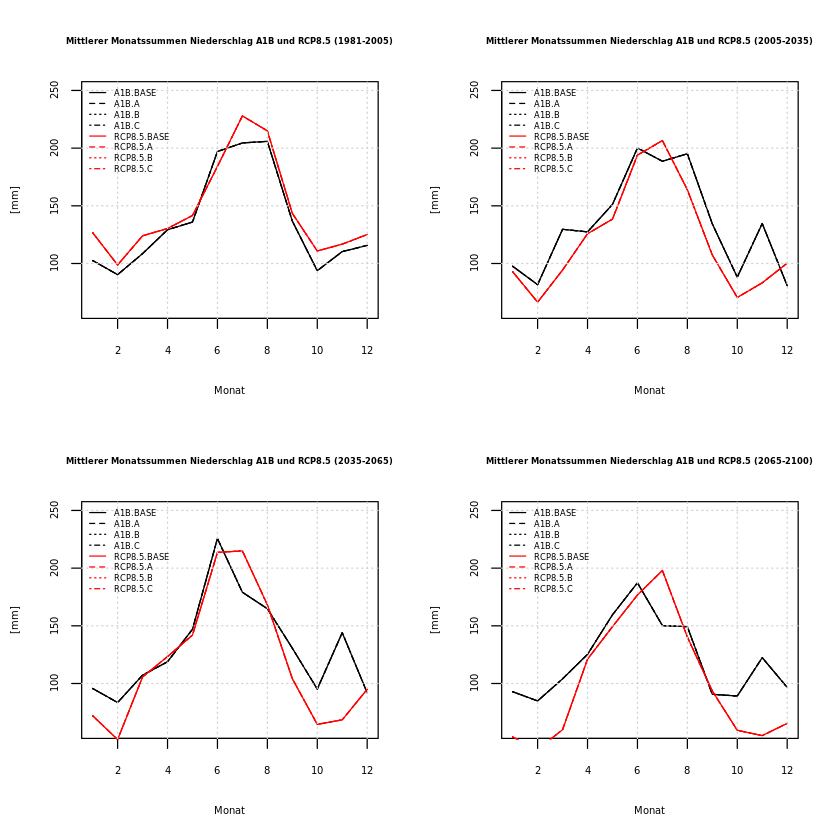

In [31]:
#4. Niederschlag
#4.1 Berechnung der Daten
#Erste Zeit
precip_1 = precip_total[precip_total$datetime>="1981-10-31" & precip_total$datetime<="2005-09-30",]
precip_1_list=list()
for(i in c(1:8)){
    precip_1_list[[i]]=aggregate(precip_1[[i+1]] ~ month, data=etr_1, FUN= mean)
}

#Zweite Zeit
precip_2 = precip_total[precip_total$datetime>="2005-10-01" & precip_total$datetime<="2035-09-30",]
precip_2_list=list()
for(i in c(1:8)){
    precip_2_list[[i]]=aggregate(precip_2[[i+1]] ~ month, data=cansubl_2, FUN= mean)
}

#Dritte Zeit
precip_3 = precip_total[precip_total$datetime>="2035-10-01" & precip_total$datetime<="2065-09-30",]
precip_3_list=list()
for(i in c(1:8)){
    precip_3_list[[i]]=aggregate(precip_3[[i+1]] ~ month, data=cansubl_3, FUN= mean)
}

#Vierte Zeit
precip_4 = precip_total[precip_total$datetime>="2070-10-01" & precip_total$datetime<="2100-09-30",]
precip_4_list=list()
for(i in c(1:8)){
    precip_4_list[[i]]=aggregate(precip_4[[i+1]] ~ month, data=cansubl_4, FUN= mean)
}

#4.2 Plot Niederschlag
par(mfrow=c(2,2))


plot(precip_1_list[[4]],type="l",ylim=c(60,250),ylab="[mm]",xlab="Monat",cex.lab=0.6,cex.axis=0.6)
lines(precip_1_list[[1]],col="black",lty=2)
lines(precip_1_list[[2]],col="black",lty=3)
lines(precip_1_list[[3]],col="black",lty=4)
lines(precip_1_list[[8]],col="red")
lines(precip_1_list[[5]],col="red",lty=2)
lines(precip_1_list[[6]],col="red",lty=3)
lines(precip_1_list[[7]],col="red",lty=4)
grid(NULL, NULL, lwd = 1)
title(main="Mittlerer Monatssummen Niederschlag A1B und RCP8.5 (1981-2005)",cex.main=0.5)
legend("topleft",legend=c("A1B.BASE","A1B.A","A1B.B","A1B.C","RCP8.5.BASE","RCP8.5.A","RCP8.5.B","RCP8.5.C"),
       col = c("black","black","black","black","red","red","red","red"),lty=linetype,bty="n",cex=0.5)

plot(precip_2_list[[4]],type="l",ylim=c(60,250),ylab="[mm]",xlab="Monat",cex.lab=0.6,cex.axis=0.6)
lines(precip_2_list[[1]],col="black",lty=2)
lines(precip_2_list[[2]],col="black",lty=3)
lines(precip_2_list[[3]],col="black",lty=4)
lines(precip_2_list[[8]],col="red")
lines(precip_2_list[[5]],col="red",lty=2)
lines(precip_2_list[[6]],col="red",lty=3)
lines(precip_2_list[[7]],col="red",lty=4)
grid(NULL, NULL, lwd = 1)
title(main="Mittlerer Monatssummen Niederschlag A1B und RCP8.5 (2005-2035)",cex.main=0.5)
legend("topleft",legend=c("A1B.BASE","A1B.A","A1B.B","A1B.C","RCP8.5.BASE","RCP8.5.A","RCP8.5.B","RCP8.5.C"),
       col = c("black","black","black","black","red","red","red","red"),lty=linetype,bty="n",cex=0.5)

plot(precip_3_list[[4]],type="l",ylim=c(60,250),ylab="[mm]",xlab="Monat",cex.lab=0.6,cex.axis=0.6)
lines(precip_3_list[[1]],col="black",lty=2)
lines(precip_3_list[[2]],col="black",lty=3)
lines(precip_3_list[[3]],col="black",lty=4)
lines(precip_3_list[[8]],col="red")
lines(precip_3_list[[5]],col="red",lty=2)
lines(precip_3_list[[6]],col="red",lty=3)
lines(precip_3_list[[7]],col="red",lty=4)
grid(NULL, NULL, lwd = 1)
title(main="Mittlerer Monatssummen Niederschlag A1B und RCP8.5 (2035-2065)",cex.main=0.5)
legend("topleft",legend=c("A1B.BASE","A1B.A","A1B.B","A1B.C","RCP8.5.BASE","RCP8.5.A","RCP8.5.B","RCP8.5.C"),
       col = c("black","black","black","black","red","red","red","red"),lty=linetype,bty="n",cex=0.5)

plot(precip_4_list[[4]],type="l",ylim=c(60,250),ylab="[mm]",xlab="Monat",cex.lab=0.6,cex.axis=0.6)
lines(precip_4_list[[1]],col="black",lty=2)
lines(precip_4_list[[2]],col="black",lty=3)
lines(precip_4_list[[3]],col="black",lty=4)
lines(precip_4_list[[8]],col="red")
lines(precip_4_list[[5]],col="red",lty=2)
lines(precip_4_list[[6]],col="red",lty=3)
lines(precip_4_list[[7]],col="red",lty=4)
grid(NULL, NULL, lwd = 1)
title(main="Mittlerer Monatssummen Niederschlag A1B und RCP8.5 (2065-2100)",cex.main=0.5)
legend("topleft",legend=c("A1B.BASE","A1B.A","A1B.B","A1B.C","RCP8.5.BASE","RCP8.5.A","RCP8.5.B","RCP8.5.C"),
       col = c("black","black","black","black","red","red","red","red"),lty=linetype,bty="n",cex=0.5)

#4.3 Interpretation
#Da die Landnutzung für den Niederschalg auf einer lokalen Ebene keine Rolle spielt, sind keine Änderungen zwischen A,B und C erkennbar.
#Im A1B Szenario gibt es einen neuen Niederschlagspeak ab 2005 im Übergang zwischen Herbst und Winter, was wahrscheinlich auf großflächige
#geänderte Niederschlagsregime zurückzuführen sein wird.Zum Ende des Jahrhunderts nimmt der 
#Gesamtniederschlag deutlich ab. Generell ist zu beobachten, dass das A1B höhrere Gesamtniederschläge aufweist. Das kann sich mit den höhren 
#Temperaturen von RCP8.5 und veränderten Großklimasystemen erklären lassen, die den hiesigen ALpenraum trockener werden lassen.

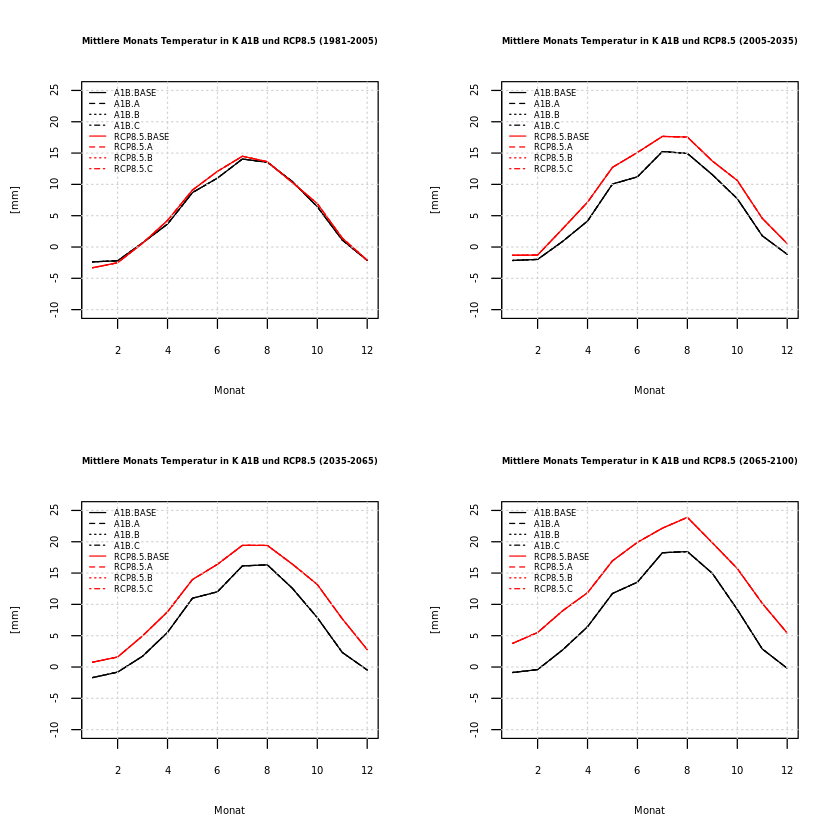

In [32]:
#5. Temperatur
#5.1 Berechnung der Daten
#Erste Zeit
temp_1 = temp_total[temp_total$datetime>="1981-10-31" & temp_total$datetime<="2005-09-30",]
temp_1_list=list()
for(i in c(1:8)){
    temp_1_list[[i]]=aggregate(temp_1[[i+1]] ~ month, data=etr_1, FUN= mean)
}

#Zweite Zeit
temp_2 = temp_total[temp_total$datetime>="2005-10-01" & temp_total$datetime<="2035-09-30",]
temp_2_list=list()
for(i in c(1:8)){
    temp_2_list[[i]]=aggregate(temp_2[[i+1]] ~ month, data=cansubl_2, FUN= mean)
}

#Dritte Zeit
temp_3 = temp_total[temp_total$datetime>="2035-10-01" & temp_total$datetime<="2065-09-30",]
temp_3_list=list()
for(i in c(1:8)){
    temp_3_list[[i]]=aggregate(temp_3[[i+1]] ~ month, data=cansubl_3, FUN= mean)
}

#Vierte Zeit
temp_4 = temp_total[temp_total$datetime>="2070-10-01" & temp_total$datetime<="2100-09-30",]
temp_4_list=list()
for(i in c(1:8)){
    temp_4_list[[i]]=aggregate(temp_4[[i+1]] ~ month, data=cansubl_4, FUN= mean)
}

#5.2 Plot Temperatur
par(mfrow=c(2,2))


plot(temp_1_list[[4]],type="l",ylim=c(-10,25),ylab="[mm]",xlab="Monat",cex.lab=0.6,cex.axis=0.6)
lines(temp_1_list[[1]],col="black",lty=2)
lines(temp_1_list[[2]],col="black",lty=3)
lines(temp_1_list[[3]],col="black",lty=4)
lines(temp_1_list[[8]],col="red")
lines(temp_1_list[[5]],col="red",lty=2)
lines(temp_1_list[[6]],col="red",lty=3)
lines(temp_1_list[[7]],col="red",lty=4)
grid(NULL, NULL, lwd = 1)
title(main="Mittlere Monats Temperatur in K A1B und RCP8.5 (1981-2005)",cex.main=0.5)
legend("topleft",legend=c("A1B.BASE","A1B.A","A1B.B","A1B.C","RCP8.5.BASE","RCP8.5.A","RCP8.5.B","RCP8.5.C"),
       col = c("black","black","black","black","red","red","red","red"),lty=linetype,bty="n",cex=0.5)

plot(temp_2_list[[4]],type="l",ylim=c(-10,25),ylab="[mm]",xlab="Monat",cex.lab=0.6,cex.axis=0.6)
lines(temp_2_list[[1]],col="black",lty=2)
lines(temp_2_list[[2]],col="black",lty=3)
lines(temp_2_list[[3]],col="black",lty=4)
lines(temp_2_list[[8]],col="red")
lines(temp_2_list[[5]],col="red",lty=2)
lines(temp_2_list[[6]],col="red",lty=3)
lines(temp_2_list[[7]],col="red",lty=4)
grid(NULL, NULL, lwd = 1)
title(main="Mittlere Monats Temperatur in K A1B und RCP8.5 (2005-2035)",cex.main=0.5)
legend("topleft",legend=c("A1B.BASE","A1B.A","A1B.B","A1B.C","RCP8.5.BASE","RCP8.5.A","RCP8.5.B","RCP8.5.C"),
       col = c("black","black","black","black","red","red","red","red"),lty=linetype,bty="n",cex=0.5)

plot(temp_3_list[[4]],type="l",ylim=c(-10,25),ylab="[mm]",xlab="Monat",cex.lab=0.6,cex.axis=0.6)
lines(temp_3_list[[1]],col="black",lty=2)
lines(temp_3_list[[2]],col="black",lty=3)
lines(temp_3_list[[3]],col="black",lty=4)
lines(temp_3_list[[8]],col="red")
lines(temp_3_list[[5]],col="red",lty=2)
lines(temp_3_list[[6]],col="red",lty=3)
lines(temp_3_list[[7]],col="red",lty=4)
grid(NULL, NULL, lwd = 1)
title(main="Mittlere Monats Temperatur in K A1B und RCP8.5 (2035-2065)",cex.main=0.5)
legend("topleft",legend=c("A1B.BASE","A1B.A","A1B.B","A1B.C","RCP8.5.BASE","RCP8.5.A","RCP8.5.B","RCP8.5.C"),
       col = c("black","black","black","black","red","red","red","red"),lty=linetype,bty="n",cex=0.5)

plot(temp_4_list[[4]],type="l",ylim=c(-10,25),ylab="[mm]",xlab="Monat",cex.lab=0.6,cex.axis=0.6)
lines(temp_4_list[[1]],col="black",lty=2)
lines(temp_4_list[[2]],col="black",lty=3)
lines(temp_4_list[[3]],col="black",lty=4)
lines(temp_4_list[[8]],col="red")
lines(temp_4_list[[5]],col="red",lty=2)
lines(temp_4_list[[6]],col="red",lty=3)
lines(temp_4_list[[7]],col="red",lty=4)
grid(NULL, NULL, lwd = 1)
title(main="Mittlere Monats Temperatur in K A1B und RCP8.5 (2065-2100)",cex.main=0.5)
legend("topleft",legend=c("A1B.BASE","A1B.A","A1B.B","A1B.C","RCP8.5.BASE","RCP8.5.A","RCP8.5.B","RCP8.5.C"),
       col = c("black","black","black","black","red","red","red","red"),lty=linetype,bty="n",cex=0.5)

#5.3 Interpretation
#Hier spielt die Landnutzung auch wieder keine Rolle, deshalb sind nur die Baseszenarien weichtig. Über den gesamten Jahresverlauf wird
#deutlich, dass das RCP8.5 höhere Durschnitsstemperaturen aufweist als A1B, das deckt sich mit den Erwartungen, dass das RCP8.5 
#allgemein eine größere Temperaturerhöhung prognostiziert.

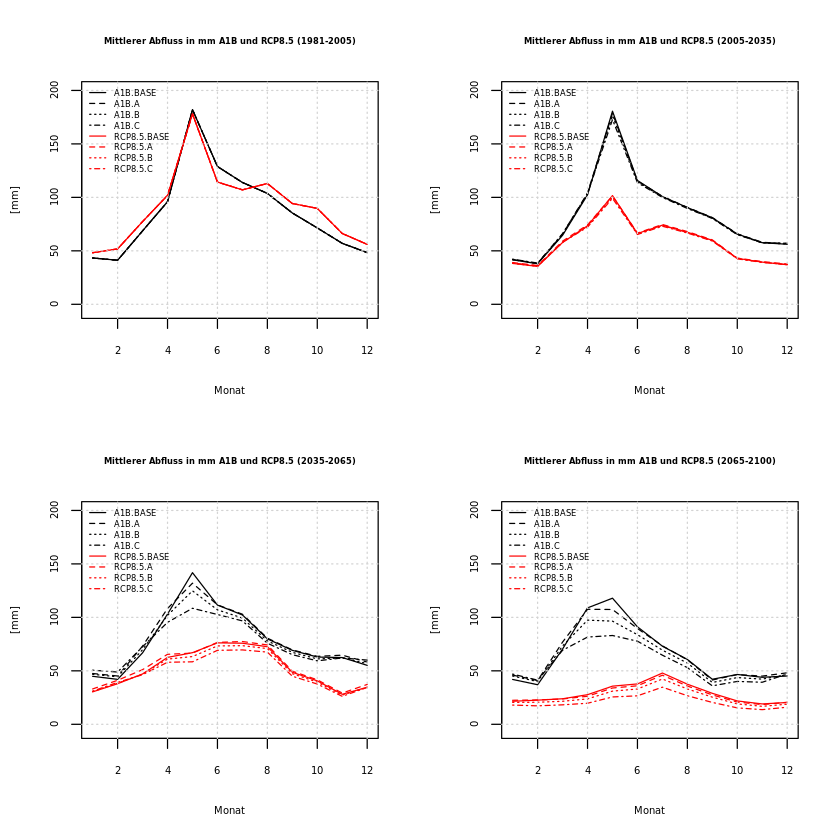

In [33]:
#6. Abfluss
#6.1 Berechnung der Daten
#Erste Zeit
runoff_1 = runoff_total[runoff_total$datetime>="1981-10-31" & runoff_total$datetime<="2005-09-30",]
runoff_1_list=list()
for(i in c(1:8)){
    runoff_1_list[[i]]=aggregate(runoff_1[[i+1]] ~ month, data=etr_1, FUN= mean)
}

#Zweite Zeit
runoff_2 = runoff_total[runoff_total$datetime>="2005-10-01" & runoff_total$datetime<="2035-09-30",]
runoff_2_list=list()
for(i in c(1:8)){
    runoff_2_list[[i]]=aggregate(runoff_2[[i+1]] ~ month, data=cansubl_2, FUN= mean)
}

#Dritte Zeit
runoff_3 = runoff_total[runoff_total$datetime>="2035-10-01" & runoff_total$datetime<="2065-09-30",]
runoff_3_list=list()
for(i in c(1:8)){
    runoff_3_list[[i]]=aggregate(runoff_3[[i+1]] ~ month, data=cansubl_3, FUN= mean)
}

#Vierte Zeit
runoff_4 = runoff_total[runoff_total$datetime>="2070-10-01" & runoff_total$datetime<="2100-09-30",]
runoff_4_list=list()
for(i in c(1:8)){
    runoff_4_list[[i]]=aggregate(runoff_4[[i+1]] ~ month, data=cansubl_4, FUN= mean)
}

#6.2 Plot Abfluss
par(mfrow=c(2,2))


plot(runoff_1_list[[4]],type="l",ylim=c(-5,200),ylab="[mm]",xlab="Monat",cex.lab=0.6,cex.axis=0.6)
lines(runoff_1_list[[1]],col="black",lty=2)
lines(runoff_1_list[[2]],col="black",lty=3)
lines(runoff_1_list[[3]],col="black",lty=4)
lines(runoff_1_list[[8]],col="red")
lines(runoff_1_list[[5]],col="red",lty=2)
lines(runoff_1_list[[6]],col="red",lty=3)
lines(runoff_1_list[[7]],col="red",lty=4)
grid(NULL, NULL, lwd = 1)
title(main="Mittlerer Abfluss in mm A1B und RCP8.5 (1981-2005)",cex.main=0.5)
legend("topleft",legend=c("A1B.BASE","A1B.A","A1B.B","A1B.C","RCP8.5.BASE","RCP8.5.A","RCP8.5.B","RCP8.5.C"),
       col = c("black","black","black","black","red","red","red","red"),lty=linetype,bty="n",cex=0.5)

plot(runoff_2_list[[4]],type="l",ylim=c(-5,200),ylab="[mm]",xlab="Monat",cex.lab=0.6,cex.axis=0.6)
lines(runoff_2_list[[1]],col="black",lty=2)
lines(runoff_2_list[[2]],col="black",lty=3)
lines(runoff_2_list[[3]],col="black",lty=4)
lines(runoff_2_list[[8]],col="red")
lines(runoff_2_list[[5]],col="red",lty=2)
lines(runoff_2_list[[6]],col="red",lty=3)
lines(runoff_2_list[[7]],col="red",lty=4)
grid(NULL, NULL, lwd = 1)
title(main="Mittlerer Abfluss in mm A1B und RCP8.5 (2005-2035)",cex.main=0.5)
legend("topleft",legend=c("A1B.BASE","A1B.A","A1B.B","A1B.C","RCP8.5.BASE","RCP8.5.A","RCP8.5.B","RCP8.5.C"),
       col = c("black","black","black","black","red","red","red","red"),lty=linetype,bty="n",cex=0.5)

plot(runoff_3_list[[4]],type="l",ylim=c(-5,200),ylab="[mm]",xlab="Monat",cex.lab=0.6,cex.axis=0.6)
lines(runoff_3_list[[1]],col="black",lty=2)
lines(runoff_3_list[[2]],col="black",lty=3)
lines(runoff_3_list[[3]],col="black",lty=4)
lines(runoff_3_list[[8]],col="red")
lines(runoff_3_list[[5]],col="red",lty=2)
lines(runoff_3_list[[6]],col="red",lty=3)
lines(runoff_3_list[[7]],col="red",lty=4)
grid(NULL, NULL, lwd = 1)
title(main="Mittlerer Abfluss in mm A1B und RCP8.5 (2035-2065)",cex.main=0.5)
legend("topleft",legend=c("A1B.BASE","A1B.A","A1B.B","A1B.C","RCP8.5.BASE","RCP8.5.A","RCP8.5.B","RCP8.5.C"),
       col = c("black","black","black","black","red","red","red","red"),lty=linetype,bty="n",cex=0.5)

plot(runoff_4_list[[4]],type="l",ylim=c(-5,200),ylab="[mm]",xlab="Monat",cex.lab=0.6,cex.axis=0.6)
lines(runoff_4_list[[1]],col="black",lty=2)
lines(runoff_4_list[[2]],col="black",lty=3)
lines(runoff_4_list[[3]],col="black",lty=4)
lines(runoff_4_list[[8]],col="red")
lines(runoff_4_list[[5]],col="red",lty=2)
lines(runoff_4_list[[6]],col="red",lty=3)
lines(runoff_4_list[[7]],col="red",lty=4)
grid(NULL, NULL, lwd = 1)
title(main="Mittlerer Abfluss in mm A1B und RCP8.5 (2065-2100)",cex.main=0.5)
legend("topleft",legend=c("A1B.BASE","A1B.A","A1B.B","A1B.C","RCP8.5.BASE","RCP8.5.A","RCP8.5.B","RCP8.5.C"),
       col = c("black","black","black","black","red","red","red","red"),lty=linetype,bty="n",cex=0.5)

#6.3 Interpretation
#Insgesamt nimmt der Abfluss über das untersuchte Jahrhundert in beiden Szenarios signifikant ab. Besonders auffällig sind die sich abflachenden/
#nicht mehr vorhandenen Abflusspitzen im Frühjar, dies deuted auf eine geringer/keine Schneebedeckung im Winter hin, die somit eie
#geringere/keine Schneeschmelze zur Folge hat. Man erkennt auch in beiden Szenarien den erhöhten durch den Sommerniederschlag erzeugten
#Abfluss, der jedoch über das Jahrhundert deutlich abnimmt. Bezogen auf die Landnutzungsszenarien zeigt sich, dass das Wasser in dem 
#Gebiet bei mehr offengelassenen Flächen deutlich besser zurückgehalten, transpiriert, und sublimiert wird, und somit dieses Wasser nicht merh dem ABfluss zur Verfügung steht.

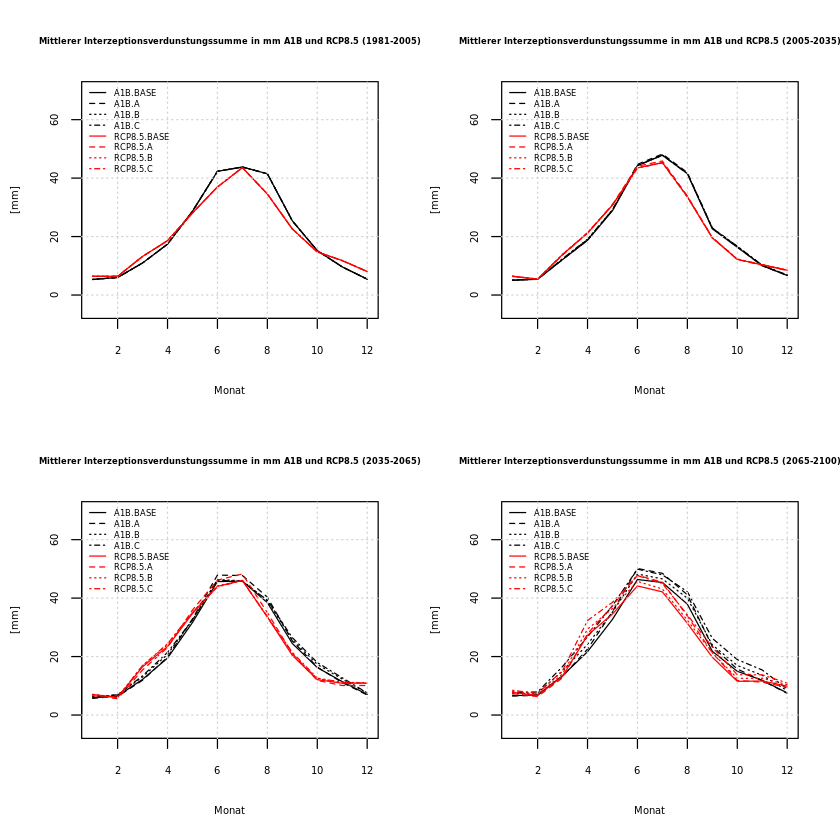

In [34]:
#7. Interzeptionsevaporation
#7.1 Berechnung der Daten
#Erste Zeit
interception_evar_1 = interception_evar_total[interception_evar_total$datetime>="1981-10-31" & interception_evar_total$datetime<="2005-09-30",]
interception_evar_1_list=list()
for(i in c(1:8)){
    interception_evar_1_list[[i]]=aggregate(interception_evar_1[[i+1]] ~ month, data=etr_1, FUN= mean)
}

#Zweite Zeit
interception_evar_2 = interception_evar_total[interception_evar_total$datetime>="2005-10-01" & interception_evar_total$datetime<="2035-09-30",]
interception_evar_2_list=list()
for(i in c(1:8)){
    interception_evar_2_list[[i]]=aggregate(interception_evar_2[[i+1]] ~ month, data=cansubl_2, FUN= mean)
}

#Dritte Zeit
interception_evar_3 = interception_evar_total[interception_evar_total$datetime>="2035-10-01" & interception_evar_total$datetime<="2065-09-30",]
interception_evar_3_list=list()
for(i in c(1:8)){
    interception_evar_3_list[[i]]=aggregate(interception_evar_3[[i+1]] ~ month, data=cansubl_3, FUN= mean)
}

#Vierte Zeit
interception_evar_4 = interception_evar_total[interception_evar_total$datetime>="2070-10-01" & interception_evar_total$datetime<="2100-09-30",]
interception_evar_4_list=list()
for(i in c(1:8)){
    interception_evar_4_list[[i]]=aggregate(interception_evar_4[[i+1]] ~ month, data=cansubl_4, FUN= mean)
}

#7.2 Plot Interzeptionsevaporation
par(mfrow=c(2,2))


plot(interception_evar_1_list[[4]],type="l",ylim=c(-5,70),ylab="[mm]",xlab="Monat",cex.lab=0.6,cex.axis=0.6)
lines(interception_evar_1_list[[1]],col="black",lty=2)
lines(interception_evar_1_list[[2]],col="black",lty=3)
lines(interception_evar_1_list[[3]],col="black",lty=4)
lines(interception_evar_1_list[[8]],col="red")
lines(interception_evar_1_list[[5]],col="red",lty=2)
lines(interception_evar_1_list[[6]],col="red",lty=3)
lines(interception_evar_1_list[[7]],col="red",lty=4)
grid(NULL, NULL, lwd = 1)
title(main="Mittlerer Interzeptionsverdunstungssumme in mm A1B und RCP8.5 (1981-2005)",cex.main=0.5)
legend("topleft",legend=c("A1B.BASE","A1B.A","A1B.B","A1B.C","RCP8.5.BASE","RCP8.5.A","RCP8.5.B","RCP8.5.C"),
       col = c("black","black","black","black","red","red","red","red"),lty=linetype,bty="n",cex=0.5)

plot(interception_evar_2_list[[4]],type="l",ylim=c(-5,70),ylab="[mm]",xlab="Monat",cex.lab=0.6,cex.axis=0.6)
lines(interception_evar_2_list[[1]],col="black",lty=2)
lines(interception_evar_2_list[[2]],col="black",lty=3)
lines(interception_evar_2_list[[3]],col="black",lty=4)
lines(interception_evar_2_list[[8]],col="red")
lines(interception_evar_2_list[[5]],col="red",lty=2)
lines(interception_evar_2_list[[6]],col="red",lty=3)
lines(interception_evar_2_list[[7]],col="red",lty=4)
grid(NULL, NULL, lwd = 1)
title(main="Mittlerer Interzeptionsverdunstungssumme in mm A1B und RCP8.5 (2005-2035)",cex.main=0.5)
legend("topleft",legend=c("A1B.BASE","A1B.A","A1B.B","A1B.C","RCP8.5.BASE","RCP8.5.A","RCP8.5.B","RCP8.5.C"),
       col = c("black","black","black","black","red","red","red","red"),lty=linetype,bty="n",cex=0.5)

plot(interception_evar_3_list[[4]],type="l",ylim=c(-5,70),ylab="[mm]",xlab="Monat",cex.lab=0.6,cex.axis=0.6)
lines(interception_evar_3_list[[1]],col="black",lty=2)
lines(interception_evar_3_list[[2]],col="black",lty=3)
lines(interception_evar_3_list[[3]],col="black",lty=4)
lines(interception_evar_3_list[[8]],col="red")
lines(interception_evar_3_list[[5]],col="red",lty=2)
lines(interception_evar_3_list[[6]],col="red",lty=3)
lines(interception_evar_3_list[[7]],col="red",lty=4)
grid(NULL, NULL, lwd = 1)
title(main="Mittlerer Interzeptionsverdunstungssumme in mm A1B und RCP8.5 (2035-2065)",cex.main=0.5)
legend("topleft",legend=c("A1B.BASE","A1B.A","A1B.B","A1B.C","RCP8.5.BASE","RCP8.5.A","RCP8.5.B","RCP8.5.C"),
       col = c("black","black","black","black","red","red","red","red"),lty=linetype,bty="n",cex=0.5)

plot(interception_evar_4_list[[4]],type="l",ylim=c(-5,70),ylab="[mm]",xlab="Monat",cex.lab=0.6,cex.axis=0.6)
lines(interception_evar_4_list[[1]],col="black",lty=2)
lines(interception_evar_4_list[[2]],col="black",lty=3)
lines(interception_evar_4_list[[3]],col="black",lty=4)
lines(interception_evar_4_list[[8]],col="red")
lines(interception_evar_4_list[[5]],col="red",lty=2)
lines(interception_evar_4_list[[6]],col="red",lty=3)
lines(interception_evar_4_list[[7]],col="red",lty=4)
grid(NULL, NULL, lwd = 1)
title(main="Mittlerer Interzeptionsverdunstungssumme in mm A1B und RCP8.5 (2065-2100)",cex.main=0.5)
legend("topleft",legend=c("A1B.BASE","A1B.A","A1B.B","A1B.C","RCP8.5.BASE","RCP8.5.A","RCP8.5.B","RCP8.5.C"),
       col = c("black","black","black","black","red","red","red","red"),lty=linetype,bty="n",cex=0.5)

#7.3 Interpretation
#Im Generellen sieht man bei beiden Szenarien, dass die Kurven zur Mitte des Jahres ansteigen,
#und dann wieder abfallen. Dies lässt sich damit erklären, dass je mehr Biomasse und dementsprechend
#Oberfläche zur Verfügung steht, desto größer ist auch die Interzeptionsverdunstungssumme.
#Über das Jahrhundert steigt diese weiterhin Signifikant an, jeweils bei beiden Szenarien, was sich auf 
#die höhere Temperatur zurückführen lässt. Zusätzlich steigt mit der Offenlassung der Flächen
#die Verdunstung deutlich an, dieser Trend wird allerding durch den geringer Niederschlag und damit
#weniger zur VErfügung stehendem Wasser gebremst.